In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('nba_2013.csv')

In [3]:

data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [6]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [7]:
data.fillna(data.median(), inplace=True)

In [8]:
data.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [9]:
data.shape

(481, 31)

In [10]:
data.corr()[:-1]

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025226,0.050611,0.028850,0.013248,...,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910,NaN
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.319403,0.518074,0.537011,0.057541,...,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462,NaN
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234255,0.501808,0.515718,0.038062,...,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294,NaN
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.272523,0.645056,0.666126,0.093103,...,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464,NaN
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.277199,0.597239,0.613988,0.073361,...,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.210511,0.662004,0.685535,0.108166,...,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN
fg.,0.025226,0.319403,0.234255,0.272523,0.277199,0.210511,1.000000,-0.025529,-0.041715,-0.011844,...,0.422582,0.376020,0.403764,0.067945,0.184828,0.400867,0.221169,0.357379,0.247576,NaN
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025529,1.000000,0.991700,0.402876,...,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342,NaN
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041715,0.991700,1.000000,0.385441,...,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076,NaN
x3p.,0.013248,0.057541,0.038062,0.093103,0.073361,0.108166,-0.011844,0.402876,0.385441,1.000000,...,-0.289301,-0.103155,-0.164503,0.170762,0.106522,-0.169542,0.061953,-0.040468,0.104156,NaN


In [11]:
data.skew()

age           0.665404
g            -0.625339
gs            0.800009
mp            0.250396
fg            0.921052
fga           0.854159
fg.          -0.600909
x3p           1.471185
x3pa          1.274138
x3p.         -0.040016
x2p           1.160080
x2pa          1.103767
x2p.         -1.125433
efg.         -1.420306
ft            1.915723
fta           1.741310
ft.          -1.829240
orb           1.994277
drb           1.258185
trb           1.377128
ast           1.845964
stl           1.089461
blk           2.623953
tov           1.063529
pf            0.198827
pts           1.046246
season_end    0.000000
dtype: float64

In [12]:
data.kurtosis()

age           -0.129451
g             -0.931150
gs            -0.992760
mp            -1.222215
fg             0.275744
fga           -0.008878
fg.            9.458319
x3p            1.731041
x3pa           0.928984
x3p.           3.921155
x2p            0.915763
x2pa           0.704128
x2p.           8.840874
efg.          10.845405
ft             4.853322
fta            3.712033
ft.            5.869714
orb            5.194463
drb            1.580516
trb            2.052070
ast            3.679198
stl            1.094083
blk            9.391225
tov            0.763095
pf            -0.976485
pts            0.812571
season_end     0.000000
dtype: float64

In [13]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [14]:
data.drop(columns=['player', 'bref_team_id', 'season'], inplace = True)

In [15]:
data.shape

(481, 28)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
data['pos'] = le.fit_transform(data['pos'])

In [18]:
data['pos'].unique()

array([5, 0, 3, 6, 4, 2, 1], dtype=int64)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 28 columns):
pos           481 non-null int32
age           481 non-null int64
g             481 non-null int64
gs            481 non-null int64
mp            481 non-null int64
fg            481 non-null int64
fga           481 non-null int64
fg.           481 non-null float64
x3p           481 non-null int64
x3pa          481 non-null int64
x3p.          481 non-null float64
x2p           481 non-null int64
x2pa          481 non-null int64
x2p.          481 non-null float64
efg.          481 non-null float64
ft            481 non-null int64
fta           481 non-null int64
ft.           481 non-null float64
orb           481 non-null int64
drb           481 non-null int64
trb           481 non-null int64
ast           481 non-null int64
stl           481 non-null int64
blk           481 non-null int64
tov           481 non-null int64
pf            481 non-null int64
pts           481 non-null 

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


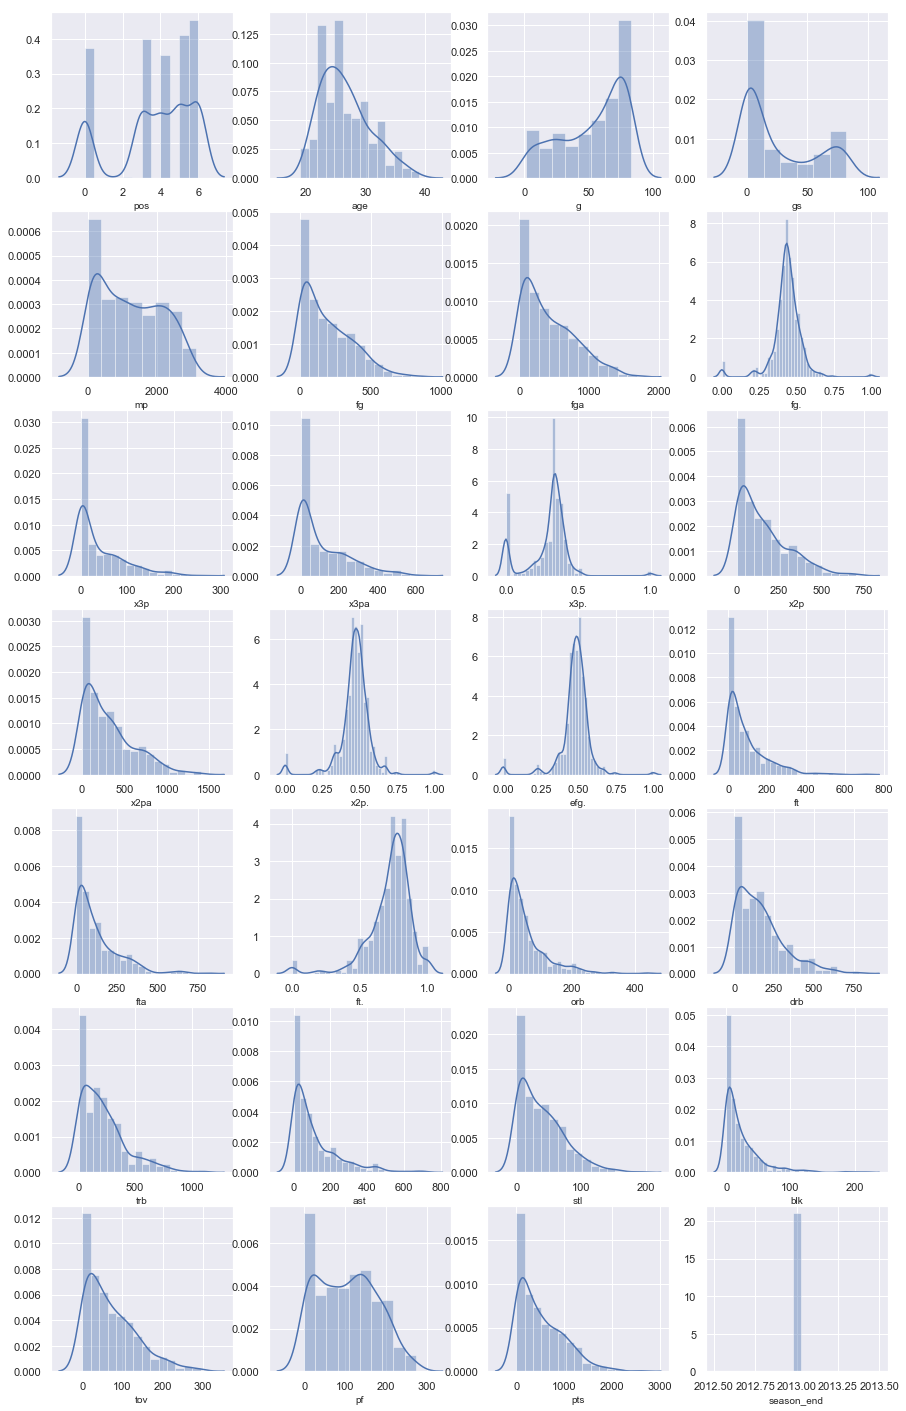

In [20]:
plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=28 :     
        ax = plt.subplot(7,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [21]:
X = data.drop(columns = ['pts'])
y = data['pts']

In [22]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,2.142228,pos
1,1.128943,age
2,7.963530,g
3,6.202422,gs
4,46.130703,mp
5,inf,fg
6,inf,fga
7,22.678999,fg.
8,inf,x3p
9,inf,x3pa


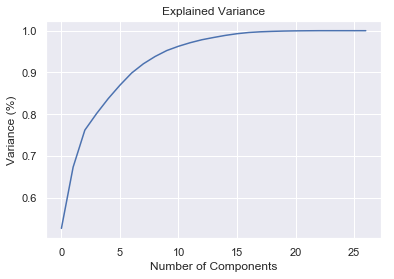

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [25]:
pca = PCA(n_components=15)
new_data = pca.fit_transform(X_scaled)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC 1', 'PC 2','PC 3','PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15'])

In [26]:
principal_Df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
0,-1.713371,1.054016,0.254018,-0.728226,-0.963124,0.037867,-0.718238,-0.556352,0.560311,-0.507913,0.148742,0.275540,-0.197279,-0.171698,-0.152359
1,0.310393,2.837376,-0.141760,-0.902155,-1.883591,0.428003,0.308206,1.215930,0.722953,-0.669285,0.340888,0.569703,0.356424,-0.554810,-0.248567
2,-0.542396,1.959521,0.463422,0.064797,-0.233090,0.058293,0.433935,-0.514979,0.226028,-0.343170,-0.040748,0.355549,-0.103770,-0.003700,-0.099435
3,4.362694,-2.612107,0.632244,-0.034708,0.853666,-0.002525,0.652833,-0.746876,-0.983096,-0.287441,-0.555663,-0.347951,-0.266888,-1.127810,-0.230360
4,-0.109788,3.029775,0.314884,-0.224514,0.203535,-1.017542,-1.198721,1.501082,-0.123634,0.154705,0.056342,-0.210694,0.207377,-0.430520,0.366350


In [27]:
x_train,x_test,y_train,y_test = train_test_split(principal_Df,y, test_size= 0.25)

In [28]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [29]:
y_pred = knn.predict(x_test)

In [30]:
knn.score(x_train,y_train)

0.9745380391518316

In [31]:
knn.score(x_test,y_test)

0.9556451639958858

In [32]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [33]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [34]:
gridsearch.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.9542550658690798, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.9474643342169276, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.9654440299886423, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.9637295130288669, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.9435860706382728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.9474643342169276, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.9654440299886423, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.9637295130288669, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.9435860706382728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.9614200495038491, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.967278996278645, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=5, score=0.9435860706382728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=5, score=0.9614200495038491, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.967278996278645, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.9443550353735277, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.9589873995811321, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.9633864496774761, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................

[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.9633864496774761, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.9352567736106582, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.9596840241580603, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.9621731902093975, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.9314837487672718, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.9615098802962995, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.9596840241580603, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.9621731902093975, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.9314837487672718, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.9615098802962995, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.9608254427320853, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.9268584626901567, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV] 

[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.9615098802962995, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.9608254427320853, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.9268584626901567, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.958036015308591, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.9608514701945086, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.9218018309829511, total=   0.0s
[CV] 

[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.9608254427320853, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.9268584626901567, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.958036015308591, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.9608514701945086, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.9218018309829511, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.9548622091632826, total=   0.0s
[CV] algorithm=br

[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.9503394907958519, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.9542550658690798, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.9474643342169276, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.9654440299886423, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, score=0.9637295130288669, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, score=0.9435860706382728, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5 ....................
[CV]  algorithm=brute

[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.9596840241580603, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.9621731902093975, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.9314837487672718, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.9615098802962995, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.9608254427320853, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.9268584626901567, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=b

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:    4.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'leaf_size': [18, 20, 25, 27, 30, 32, 34], 'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [35]:
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 7}

In [36]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =5)

In [37]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [38]:
knn.score(x_train,y_train)

0.9745380391518316

In [39]:
knn.score(x_test,y_test)

0.9556451639958858

In [40]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

12

In [41]:
from statistics import mean
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9667768998431372 and test score is :   0.9586863535127554
for k =  2
train_score is :   0.9686309040177763 and test score is :   0.9705913233277744
for k =  3
train_score is :   0.9679496048912617 and test score is :   0.9563765653588697
for k =  4
train_score is :   0.9685458414194142 and test score is :   0.926243210344422
for k =  5
train_score is :   0.9636592130847923 and test score is :   0.9720881238009648
for k =  6
train_score is :   0.9680356369304192 and test score is :   0.9595922062757645
for k =  7
train_score is :   0.9679218863942549 and test score is :   0.9751278445723452
for k =  8
train_score is :   0.9676110494236667 and test score is :   0.9739440485158231
for k =  9
train_score is :   0.9690233354864748 and test score is :   0.9615985207324949
for k =  10
train_score is :   0.9706671988665065 and test score is :   0.9160671343755933
for k =  11
train_score is :   0.9680993634685702 and test score is :   0.9678465818541175
for k =  

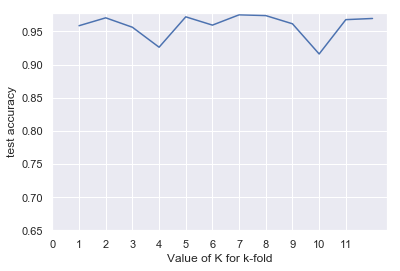

In [42]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05))
plt.show()